# An√°lisis Exploratorio de Datos (EDA) - Dataset de Pel√≠culas

Este notebook contiene un an√°lisis exploratorio completo del dataset de pel√≠culas, incluyendo:
- Carga y exploraci√≥n inicial de datos
- An√°lisis estad√≠stico descriptivo
- An√°lisis de distribuciones
- An√°lisis de g√©neros
- Correlaciones
- Visualizaciones
- Insights y conclusiones

## 1. Importaci√≥n de Librer√≠as y Carga de Datos

In [1]:
# Importar librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Configuraci√≥n de estilo para visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuraci√≥n de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("‚úì Librer√≠as importadas correctamente")

‚úì Librer√≠as importadas correctamente


In [2]:
# Cargar el dataset de pel√≠culas
with open('movies.json', 'r', encoding='utf-8') as f:
    movies_data = json.load(f)

# Convertir a DataFrame
df = pd.DataFrame(movies_data)

print(f"‚úì Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape[0]} filas y {df.shape[1]} columnas")
print(f"\nPrimeras filas del dataset:")
df.head(10)

‚úì Dataset cargado exitosamente
Dimensiones del dataset: 1768 filas y 7 columnas

Primeras filas del dataset:


ID                      name  puan genre_1    genre_2  pop  \
0   1             The Godfather   9.2   Crime      Drama   99   
1   2           The Dark Knight   9.0  Action      Crime   96   
2   3              Pulp Fiction   8.9   Crime      Drama   95   
3   4                 Inception   8.8  Sci-Fi   Thriller   94   
4   5              Forrest Gump   8.8   Drama    Romance   93   
5   6                The Matrix   8.7  Sci-Fi     Action   92   
6   7  The Shawshank Redemption   9.3   Drama      Crime   98   
7   8                Fight Club   8.8   Drama   Thriller   91   
8   9              The Avengers   8.4  Action     Sci-Fi   89   
9  10              Interstellar   8.6  Sci-Fi  Adventure   93   

                                         description  
0  A timeless saga of a mafia family and their pu...  
1  A gripping tale of Batman facing his most icon...  
2  A masterful intertwining of crime stories with...  
3  A mind-bending journey through dreams and the ...  
4  A heartwarming story of an extraordinary man w...  
5  A revolutionary sci-fi thriller about the natu...  
6  A powerful story of hope, friendship, and resi...  
7  A provocative exploration of identity, consume...  
8  A thrilling superhero team-up to save the worl...  
9  An epic journey through space to ensure humani...

## 2. Informaci√≥n General del Dataset

In [3]:
# Informaci√≥n general del dataset
print("=" * 80)
print("INFORMACI√ìN GENERAL DEL DATASET")
print("=" * 80)
print(f"\nN√∫mero total de pel√≠culas: {df.shape[0]}")
print(f"N√∫mero de caracter√≠sticas: {df.shape[1]}")
print(f"\nColumnas del dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col} ({df[col].dtype})")

print(f"\n{'=' * 80}")
print("INFORMACI√ìN DETALLADA")
print("=" * 80)
df.info()

INFORMACI√ìN GENERAL DEL DATASET

N√∫mero total de pel√≠culas: 1768
N√∫mero de caracter√≠sticas: 7

Columnas del dataset:
  1. ID (int64)
  2. name (object)
  3. puan (float64)
  4. genre_1 (object)
  5. genre_2 (object)
  6. pop (int64)
  7. description (object)

INFORMACI√ìN DETALLADA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1768 non-null   int64  
 1   name         1768 non-null   object 
 2   puan         1768 non-null   float64
 3   genre_1      1768 non-null   object 
 4   genre_2      1768 non-null   object 
 5   pop          1768 non-null   int64  
 6   description  1768 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 96.8+ KB


In [4]:
# Verificar valores nulos
print("=" * 80)
print("AN√ÅLISIS DE VALORES NULOS")
print("=" * 80)

null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_info = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Nulos': null_counts.values,
    'Porcentaje (%)': null_percentages.values
})

print(null_info.to_string(index=False))

if null_counts.sum() == 0:
    print("\n‚úì ¬°Excelente! No hay valores nulos en el dataset")
else:
    print(f"\n‚ö† Total de valores nulos: {null_counts.sum()}")

AN√ÅLISIS DE VALORES NULOS
    Columna  Valores Nulos  Porcentaje (%)
         ID              0             0.0
       name              0             0.0
       puan              0             0.0
    genre_1              0             0.0
    genre_2              0             0.0
        pop              0             0.0
description              0             0.0

‚úì ¬°Excelente! No hay valores nulos en el dataset


In [5]:
# Verificar duplicados
print("=" * 80)
print("AN√ÅLISIS DE DUPLICADOS")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"N√∫mero de filas duplicadas: {duplicates}")

# Verificar duplicados por ID
duplicate_ids = df['ID'].duplicated().sum()
print(f"N√∫mero de IDs duplicados: {duplicate_ids}")

# Verificar duplicados por nombre
duplicate_names = df['name'].duplicated().sum()
print(f"N√∫mero de nombres duplicados: {duplicate_names}")

if duplicates == 0:
    print("\n‚úì No hay filas duplicadas en el dataset")
else:
    print(f"\n‚ö† Se encontraron {duplicates} filas duplicadas")

AN√ÅLISIS DE DUPLICADOS
N√∫mero de filas duplicadas: 0
N√∫mero de IDs duplicados: 0
N√∫mero de nombres duplicados: 28

‚úì No hay filas duplicadas en el dataset


## 3. An√°lisis Estad√≠stico Descriptivo

In [6]:
# Estad√≠sticas descriptivas de variables num√©ricas
print("=" * 80)
print("ESTAD√çSTICAS DESCRIPTIVAS - VARIABLES NUM√âRICAS")
print("=" * 80)

# Descripci√≥n estad√≠stica
desc_stats = df[['puan', 'pop']].describe()
print(desc_stats)

print("\n" + "=" * 80)
print("ESTAD√çSTICAS ADICIONALES")
print("=" * 80)

# Estad√≠sticas adicionales
for col in ['puan', 'pop']:
    print(f"\n{col.upper()}:")
    print(f"  Rango: {df[col].min()} - {df[col].max()}")
    print(f"  Mediana: {df[col].median()}")
    print(f"  Moda: {df[col].mode().values[0] if len(df[col].mode()) > 0 else 'N/A'}")
    print(f"  Varianza: {df[col].var():.2f}")
    print(f"  Desviaci√≥n est√°ndar: {df[col].std():.2f}")
    print(f"  Coeficiente de variaci√≥n: {(df[col].std() / df[col].mean() * 100):.2f}%")

ESTAD√çSTICAS DESCRIPTIVAS - VARIABLES NUM√âRICAS
              puan          pop
count  1768.000000  1768.000000
mean      7.471606    78.678167
std       0.600770     7.611903
min       3.600000    49.000000
25%       7.100000    73.000000
50%       7.500000    79.000000
75%       7.900000    84.000000
max       9.300000    99.000000

ESTAD√çSTICAS ADICIONALES

PUAN:
  Rango: 3.6 - 9.3
  Mediana: 7.5
  Moda: 7.6
  Varianza: 0.36
  Desviaci√≥n est√°ndar: 0.60
  Coeficiente de variaci√≥n: 8.04%

POP:
  Rango: 49 - 99
  Mediana: 79.0
  Moda: 80
  Varianza: 57.94
  Desviaci√≥n est√°ndar: 7.61
  Coeficiente de variaci√≥n: 9.67%


## 4. An√°lisis de Distribuci√≥n de Variables Num√©ricas

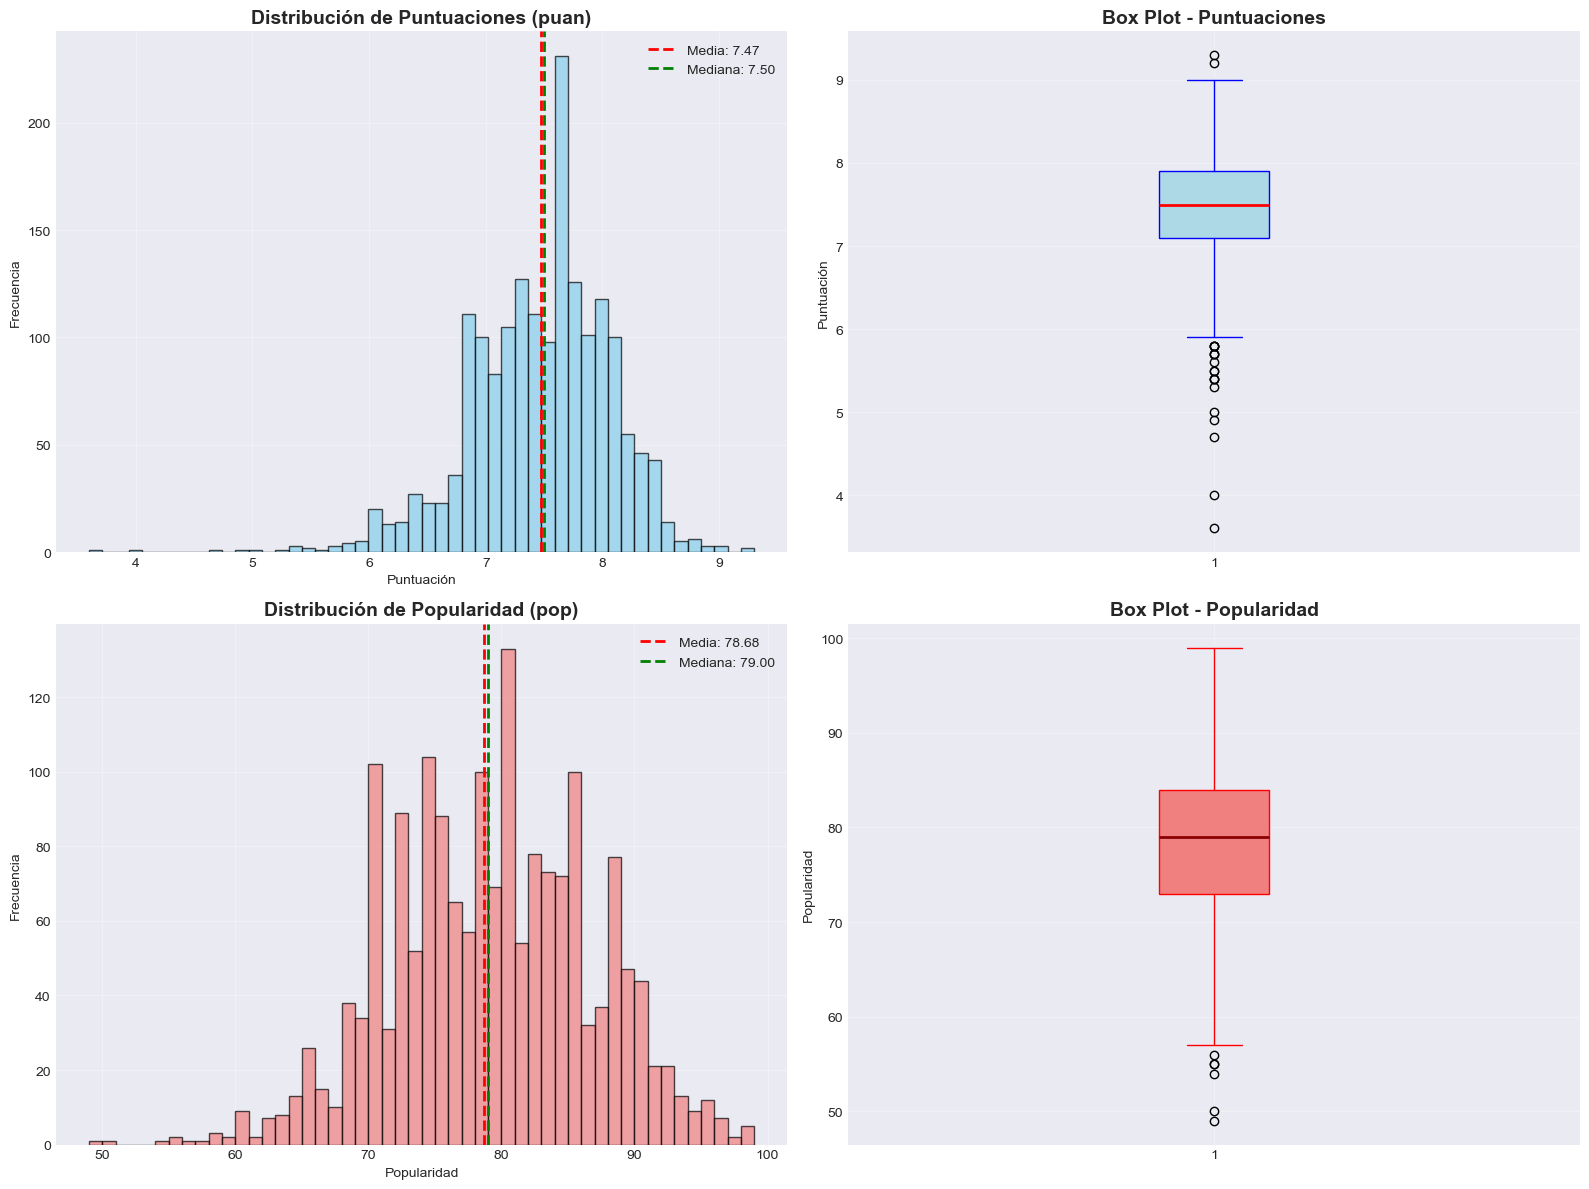


üìä Interpretaci√≥n:
  ‚Ä¢ Puntuaci√≥n media: 7.47 (rango: 3.6-9.3)
  ‚Ä¢ Popularidad media: 78.68 (rango: 49-99)


In [7]:
# Distribuci√≥n de puntuaci√≥n (puan)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de puntuaci√≥n
axes[0, 0].hist(df['puan'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribuci√≥n de Puntuaciones (puan)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Puntuaci√≥n')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df['puan'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["puan"].mean():.2f}')
axes[0, 0].axvline(df['puan'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["puan"].median():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot de puntuaci√≥n
axes[0, 1].boxplot(df['puan'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='blue'),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(color='blue'),
                   capprops=dict(color='blue'))
axes[0, 1].set_title('Box Plot - Puntuaciones', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Puntuaci√≥n')
axes[0, 1].grid(True, alpha=0.3)

# Histograma de popularidad
axes[1, 0].hist(df['pop'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribuci√≥n de Popularidad (pop)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Popularidad')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].axvline(df['pop'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["pop"].mean():.2f}')
axes[1, 0].axvline(df['pop'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["pop"].median():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Box plot de popularidad
axes[1, 1].boxplot(df['pop'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightcoral', color='red'),
                   medianprops=dict(color='darkred', linewidth=2),
                   whiskerprops=dict(color='red'),
                   capprops=dict(color='red'))
axes[1, 1].set_title('Box Plot - Popularidad', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Popularidad')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nüìä Interpretaci√≥n:")
print(f"  ‚Ä¢ Puntuaci√≥n media: {df['puan'].mean():.2f} (rango: {df['puan'].min()}-{df['puan'].max()})")
print(f"  ‚Ä¢ Popularidad media: {df['pop'].mean():.2f} (rango: {df['pop'].min()}-{df['pop'].max()})")

## 5. An√°lisis de G√©neros

In [8]:
# An√°lisis de g√©neros principales y secundarios
print("=" * 80)
print("AN√ÅLISIS DE G√âNEROS")
print("=" * 80)

# Contar g√©neros primarios
genre1_counts = df['genre_1'].value_counts()
print("\nG√âNEROS PRIMARIOS (Top 10):")
print(genre1_counts.head(10))

# Contar g√©neros secundarios
genre2_counts = df['genre_2'].value_counts()
print("\n\nG√âNEROS SECUNDARIOS (Top 10):")
print(genre2_counts.head(10))

# Todos los g√©neros √∫nicos
all_genres = pd.concat([df['genre_1'], df['genre_2']]).unique()
print(f"\n\nTotal de g√©neros √∫nicos: {len(all_genres)}")
print(f"G√©neros: {sorted(all_genres)}")

AN√ÅLISIS DE G√âNEROS

G√âNEROS PRIMARIOS (Top 10):
genre_1
Drama        710
Comedy       252
Action       203
Animation    105
Romance       89
Crime         70
Sci-Fi        66
Horror        65
Biography     50
Adventure     40
Name: count, dtype: int64


G√âNEROS SECUNDARIOS (Top 10):
genre_2
Drama        381
Romance      251
Thriller     160
Comedy       159
Adventure    113
Crime         81
War           77
Fantasy       75
Mystery       72
Sci-Fi        64
Name: count, dtype: int64


Total de g√©neros √∫nicos: 52
G√©neros: ['', 'Action', 'Adventure', 'Animation', 'Anthology', 'Art', 'Biographical', 'Biography', 'Classic', 'Comedy', 'Coming of Age', 'Crime', 'Dark', 'Dark Comedy', 'Documentary', 'Drama', 'Experimental', 'Family', 'Fantasy', 'Feminism', 'Historical', 'History', 'Horror', 'Indie', 'LGBTQ', 'LGBTQ+', 'Mockumentary', 'Music', 'Musical', 'Mystery', 'Mythology', 'Philosophical', 'Philosophy', 'Political', 'Psychological', 'Religion', 'Road Movie', 'Romance', 'Romantic',

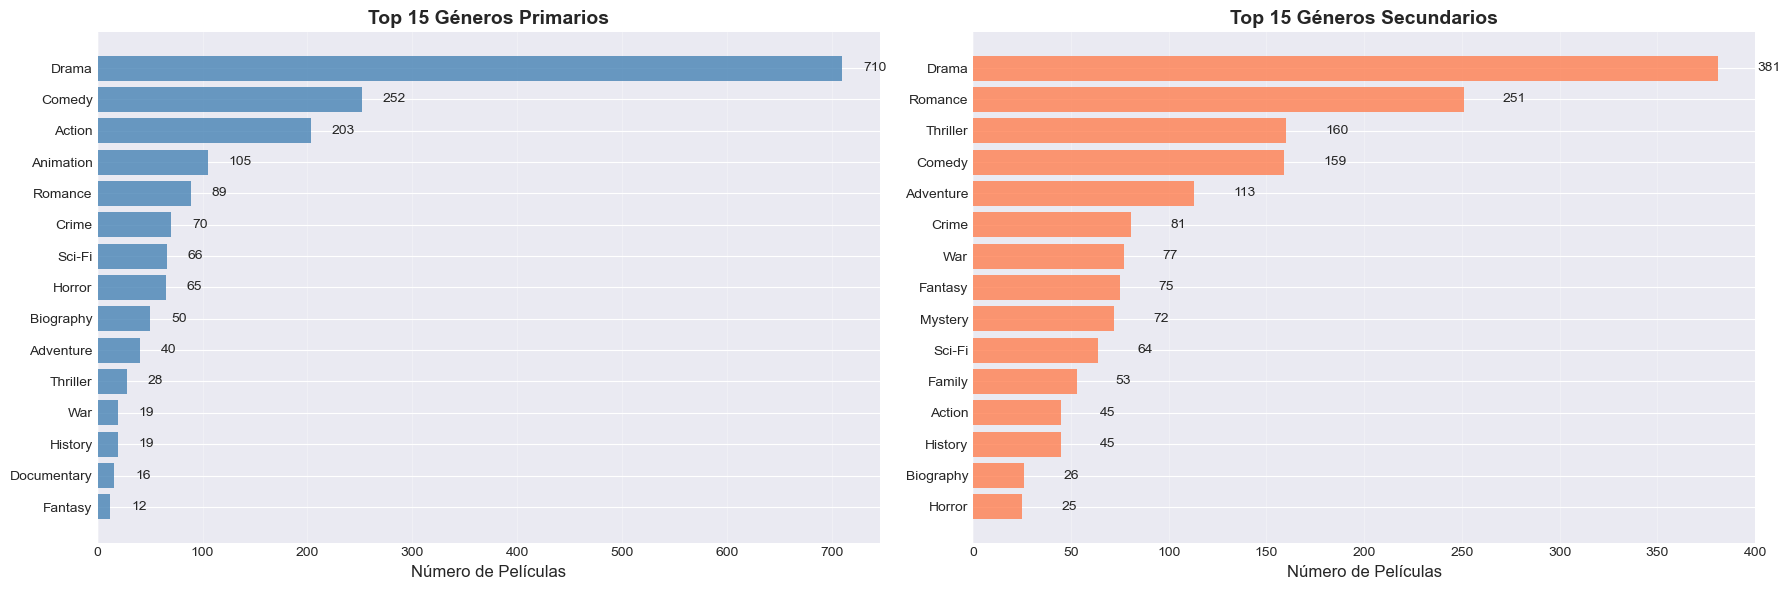

In [9]:
# Visualizaci√≥n de distribuci√≥n de g√©neros
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 15 g√©neros primarios
top_genre1 = df['genre_1'].value_counts().head(15)
axes[0].barh(range(len(top_genre1)), top_genre1.values, color='steelblue', alpha=0.8)
axes[0].set_yticks(range(len(top_genre1)))
axes[0].set_yticklabels(top_genre1.index)
axes[0].set_xlabel('N√∫mero de Pel√≠culas', fontsize=12)
axes[0].set_title('Top 15 G√©neros Primarios', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
for i, v in enumerate(top_genre1.values):
    axes[0].text(v + 20, i, str(v), va='center', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='x')

# Top 15 g√©neros secundarios
top_genre2 = df['genre_2'].value_counts().head(15)
axes[1].barh(range(len(top_genre2)), top_genre2.values, color='coral', alpha=0.8)
axes[1].set_yticks(range(len(top_genre2)))
axes[1].set_yticklabels(top_genre2.index)
axes[1].set_xlabel('N√∫mero de Pel√≠culas', fontsize=12)
axes[1].set_title('Top 15 G√©neros Secundarios', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
for i, v in enumerate(top_genre2.values):
    axes[1].text(v + 20, i, str(v), va='center', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

TOP 20 COMBINACIONES DE G√âNEROS
 1. Drama + Romance                          -  198 pel√≠culas
 2. Comedy + Drama                           -  111 pel√≠culas
 3. Drama + Thriller                         -   74 pel√≠culas
 4. Drama + War                              -   63 pel√≠culas
 5. Romance + Comedy                         -   55 pel√≠culas
 6. Drama + Mystery                          -   47 pel√≠culas
 7. Biography + Drama                        -   45 pel√≠culas
 8. Crime + Drama                            -   45 pel√≠culas
 9. Action + Adventure                       -   43 pel√≠culas
10. Animation + Adventure                    -   42 pel√≠culas
11. Drama + Comedy                           -   42 pel√≠culas
12. Drama + Family                           -   41 pel√≠culas
13. Comedy + Romance                         -   40 pel√≠culas
14. Drama + History                          -   40 pel√≠culas
15. Action + Drama                           -   35 pel√≠culas
16. Action + Sci-Fi   

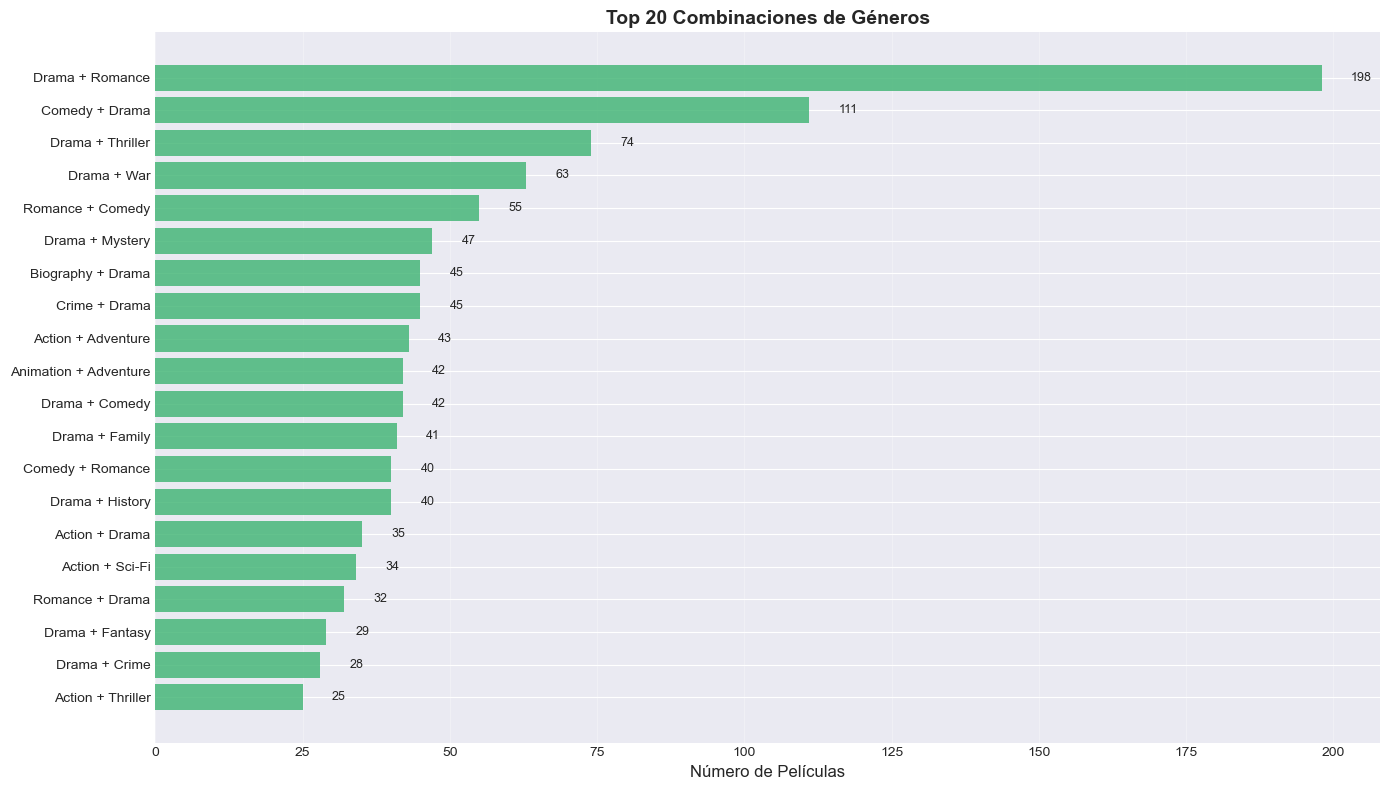

In [10]:
# An√°lisis de combinaciones de g√©neros m√°s frecuentes
df['genre_combination'] = df['genre_1'] + ' + ' + df['genre_2']
top_combinations = df['genre_combination'].value_counts().head(20)

print("=" * 80)
print("TOP 20 COMBINACIONES DE G√âNEROS")
print("=" * 80)
for i, (combo, count) in enumerate(top_combinations.items(), 1):
    print(f"{i:2d}. {combo:40s} - {count:4d} pel√≠culas")

# Visualizaci√≥n
plt.figure(figsize=(14, 8))
plt.barh(range(len(top_combinations)), top_combinations.values, color='mediumseagreen', alpha=0.8)
plt.yticks(range(len(top_combinations)), top_combinations.index, fontsize=10)
plt.xlabel('N√∫mero de Pel√≠culas', fontsize=12)
plt.title('Top 20 Combinaciones de G√©neros', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(top_combinations.values):
    plt.text(v + 5, i, str(v), va='center', fontsize=9)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 6. An√°lisis de Puntuaci√≥n por G√©nero

In [11]:
# Estad√≠sticas de puntuaci√≥n por g√©nero primario
genre_stats = df.groupby('genre_1')['puan'].agg(['mean', 'median', 'std', 'count']).round(2)
genre_stats = genre_stats.sort_values('mean', ascending=False)

print("=" * 80)
print("ESTAD√çSTICAS DE PUNTUACI√ìN POR G√âNERO PRIMARIO")
print("=" * 80)
print(genre_stats.to_string())

# Top 10 g√©neros con mejor puntuaci√≥n promedio (m√≠nimo 20 pel√≠culas)
top_rated_genres = genre_stats[genre_stats['count'] >= 20].head(10)

plt.figure(figsize=(14, 8))
x = range(len(top_rated_genres))
plt.bar(x, top_rated_genres['mean'], color='gold', alpha=0.8, label='Puntuaci√≥n Media')
plt.errorbar(x, top_rated_genres['mean'], yerr=top_rated_genres['std'], 
             fmt='none', ecolor='red', capsize=5, alpha=0.7, label='Desviaci√≥n Est√°ndar')
plt.xticks(x, top_rated_genres.index, rotation=45, ha='right')
plt.ylabel('Puntuaci√≥n Media', fontsize=12)
plt.title('Top 10 G√©neros con Mejor Puntuaci√≥n (m√≠n. 20 pel√≠culas)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

ESTAD√çSTICAS DE PUNTUACI√ìN POR G√âNERO PRIMARIO
             mean  median   std  count
genre_1                               
Family       8.10    8.10   NaN      1
Crime        7.91    7.90  0.51     70
Documentary  7.73    7.70  0.34     16
Biography    7.68    7.70  0.54     50
Romantic     7.60    7.45  0.50      4
Adventure    7.59    7.70  0.71     40
Thriller     7.58    7.60  0.43     28
Drama        7.58    7.60  0.53    710
Western      7.55    7.55  0.35      2
War          7.55    7.70  0.54     19
Musical      7.50    7.50  0.14      2
Sci-Fi       7.49    7.60  0.77     66
Mystery      7.49    7.30  0.49     11
History      7.48    7.50  0.46     19
Historical   7.45    7.50  0.41      4
Animation    7.45    7.60  0.68    105
Comedy       7.37    7.30  0.52    252
Action       7.29    7.40  0.67    203
Fantasy      7.27    7.30  0.69     12
Romance      7.04    7.00  0.59     89
Horror       7.01    7.00  0.61     65


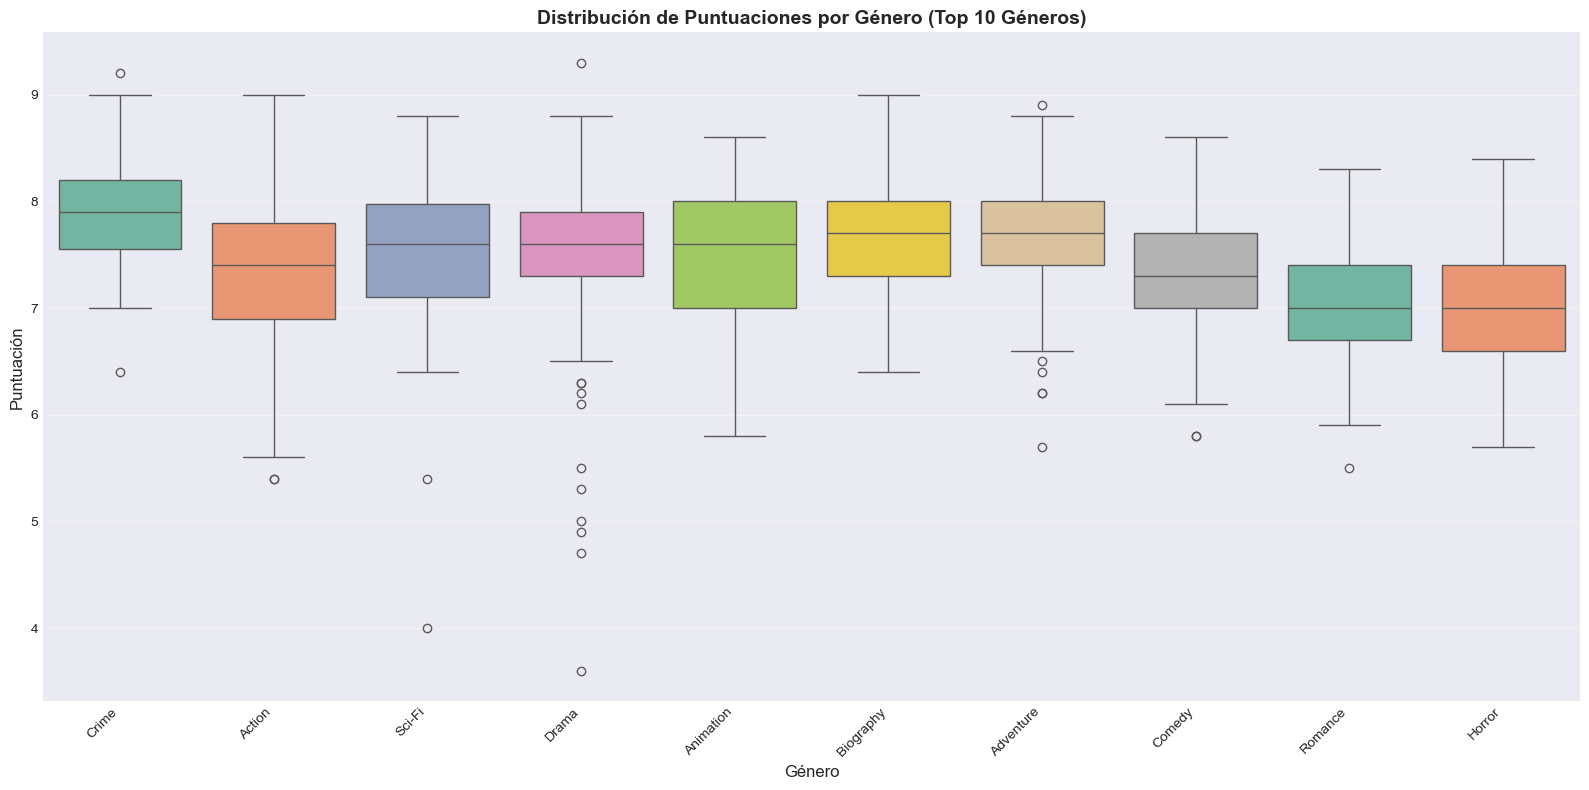

In [12]:
# Box plot de puntuaciones por g√©nero (top 10 g√©neros m√°s frecuentes)
top_10_genres = df['genre_1'].value_counts().head(10).index
df_top_genres = df[df['genre_1'].isin(top_10_genres)]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df_top_genres, x='genre_1', y='puan', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('G√©nero', fontsize=12)
plt.ylabel('Puntuaci√≥n', fontsize=12)
plt.title('Distribuci√≥n de Puntuaciones por G√©nero (Top 10 G√©neros)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 7. An√°lisis de Popularidad por G√©nero

ESTAD√çSTICAS DE POPULARIDAD POR G√âNERO PRIMARIO
              mean  median    std  count
genre_1                                 
Adventure    83.92    84.5   7.24     40
Musical      83.50    83.5   2.12      2
Crime        83.33    83.5   7.44     70
Action       83.25    84.0   6.04    203
Sci-Fi       82.68    83.0   7.17     66
Romantic     81.25    79.0   7.46      4
Biography    80.82    81.0   7.50     50
War          80.63    80.0   6.82     19
Animation    79.51    80.0   7.42    105
Romance      78.10    78.0   5.31     89
Thriller     78.07    76.5   6.62     28
Family       78.00    78.0    NaN      1
History      77.89    77.0   5.34     19
Drama        77.11    77.0   7.43    710
Comedy       77.04    77.0   7.81    252
Horror       76.20    76.0   6.24     65
Mystery      76.18    75.0   8.91     11
Western      75.00    75.0   4.24      2
Documentary  73.88    73.5   6.13     16
Fantasy      73.83    75.0  11.45     12
Historical   69.75    68.0   4.19      4


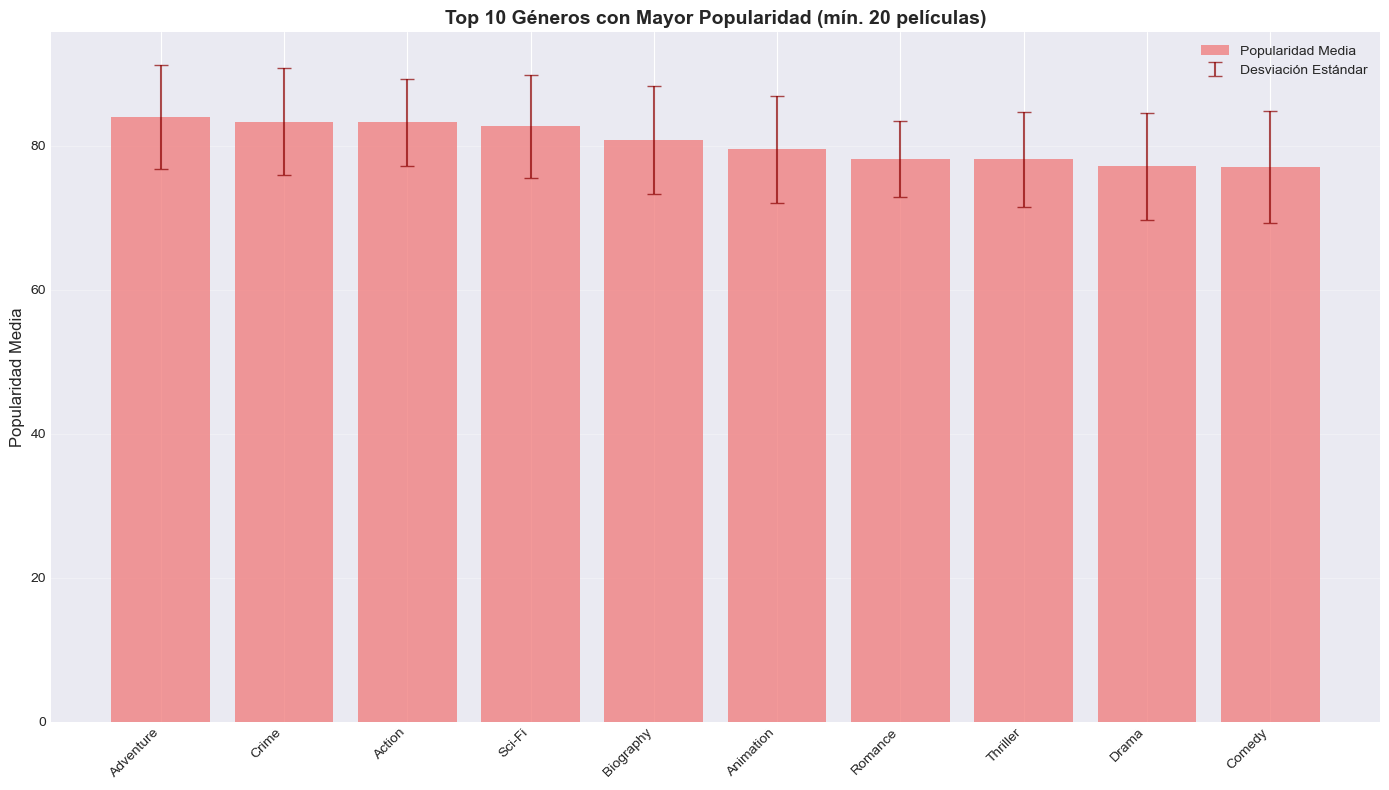

In [18]:
# Estad√≠sticas de popularidad por g√©nero
pop_stats = df.groupby('genre_1')['pop'].agg(['mean', 'median', 'std', 'count']).round(2)
pop_stats = pop_stats.sort_values('mean', ascending=False)

print("=" * 80)
print("ESTAD√çSTICAS DE POPULARIDAD POR G√âNERO PRIMARIO")
print("=" * 80)
print(pop_stats.to_string())

# Visualizaci√≥n
top_pop_genres = pop_stats[pop_stats['count'] >= 20].head(10)

plt.figure(figsize=(14, 8))
x = range(len(top_pop_genres))
plt.bar(x, top_pop_genres['mean'], color='lightcoral', alpha=0.8, label='Popularidad Media')
plt.errorbar(x, top_pop_genres['mean'], yerr=top_pop_genres['std'], 
             fmt='none', ecolor='darkred', capsize=5, alpha=0.7, label='Desviaci√≥n Est√°ndar')
plt.xticks(x, top_pop_genres.index, rotation=45, ha='right')
plt.ylabel('Popularidad Media', fontsize=12)
plt.title('Top 10 G√©neros con Mayor Popularidad (m√≠n. 20 pel√≠culas)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 8. Correlaci√≥n entre Variables

In [19]:
# Matriz de correlaci√≥n
correlation_matrix = df[['puan', 'pop']].corr()

print("=" * 80)
print("MATRIZ DE CORRELACI√ìN")
print("=" * 80)
print(correlation_matrix)

# Visualizaci√≥n de la matriz de correlaci√≥n
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            fmt='.3f', ax=axes[0])
axes[0].set_title('Matriz de Correlaci√≥n', fontsize=14, fontweight='bold')

# Scatter plot de puntuaci√≥n vs popularidad
axes[1].scatter(df['puan'], df['pop'], alpha=0.5, color='steelblue', edgecolors='black', s=30)
axes[1].set_xlabel('Puntuaci√≥n (puan)', fontsize=12)
axes[1].set_ylabel('Popularidad (pop)', fontsize=12)
axes[1].set_title(f'Relaci√≥n entre Puntuaci√≥n y Popularidad\n(Correlaci√≥n: {correlation_matrix.loc["puan", "pop"]:.3f})', 
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# L√≠nea de tendencia
z = np.polyfit(df['puan'], df['pop'], 1)
p = np.poly1d(z)
axes[1].plot(df['puan'], p(df['puan']), "r--", linewidth=2, label='Tendencia')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nüìä Interpretaci√≥n:")
corr_value = correlation_matrix.loc['puan', 'pop']
if corr_value > 0.7:
    print(f"  ‚Ä¢ Existe una correlaci√≥n FUERTE positiva ({corr_value:.3f}) entre puntuaci√≥n y popularidad")
elif corr_value > 0.4:
    print(f"  ‚Ä¢ Existe una correlaci√≥n MODERADA positiva ({corr_value:.3f}) entre puntuaci√≥n y popularidad")
elif corr_value > 0:
    print(f"  ‚Ä¢ Existe una correlaci√≥n D√âBIL positiva ({corr_value:.3f}) entre puntuaci√≥n y popularidad")
else:
    print(f"  ‚Ä¢ La correlaci√≥n es negativa o nula ({corr_value:.3f})")

MATRIZ DE CORRELACI√ìN
          puan       pop
puan  1.000000  0.582729
pop   0.582729  1.000000



üìä Interpretaci√≥n:
  ‚Ä¢ Existe una correlaci√≥n MODERADA positiva (0.583) entre puntuaci√≥n y popularidad


## 9. Top Pel√≠culas

In [14]:
# Top 20 pel√≠culas mejor puntuadas
print("=" * 80)
print("TOP 20 PEL√çCULAS MEJOR PUNTUADAS")
print("=" * 80)
top_rated = df.nlargest(20, 'puan')[['name', 'puan', 'pop', 'genre_1', 'genre_2']]
print(top_rated.to_string(index=False))

# Top 20 pel√≠culas m√°s populares
print("\n" + "=" * 80)
print("TOP 20 PEL√çCULAS M√ÅS POPULARES")
print("=" * 80)
top_popular = df.nlargest(20, 'pop')[['name', 'puan', 'pop', 'genre_1', 'genre_2']]
print(top_popular.to_string(index=False))

TOP 20 PEL√çCULAS MEJOR PUNTUADAS
                                             name  puan  pop   genre_1   genre_2
                         The Shawshank Redemption   9.3   98     Drama     Crime
                                    The Godfather   9.2   99     Crime     Drama
                                  The Dark Knight   9.0   96    Action     Crime
                                 Schindler's List   9.0   97 Biography     Drama
                            The Godfather Part II   9.0   95     Crime     Drama
                                     Pulp Fiction   8.9   95     Crime     Drama
    The Lord of the Rings: The Return of the King   8.9   97 Adventure   Fantasy
                           The Godfather Part III   8.9   98     Crime     Drama
                                        Inception   8.8   94    Sci-Fi  Thriller
                                     Forrest Gump   8.8   93     Drama   Romance
                                       Fight Club   8.8   91     Drama  Thr

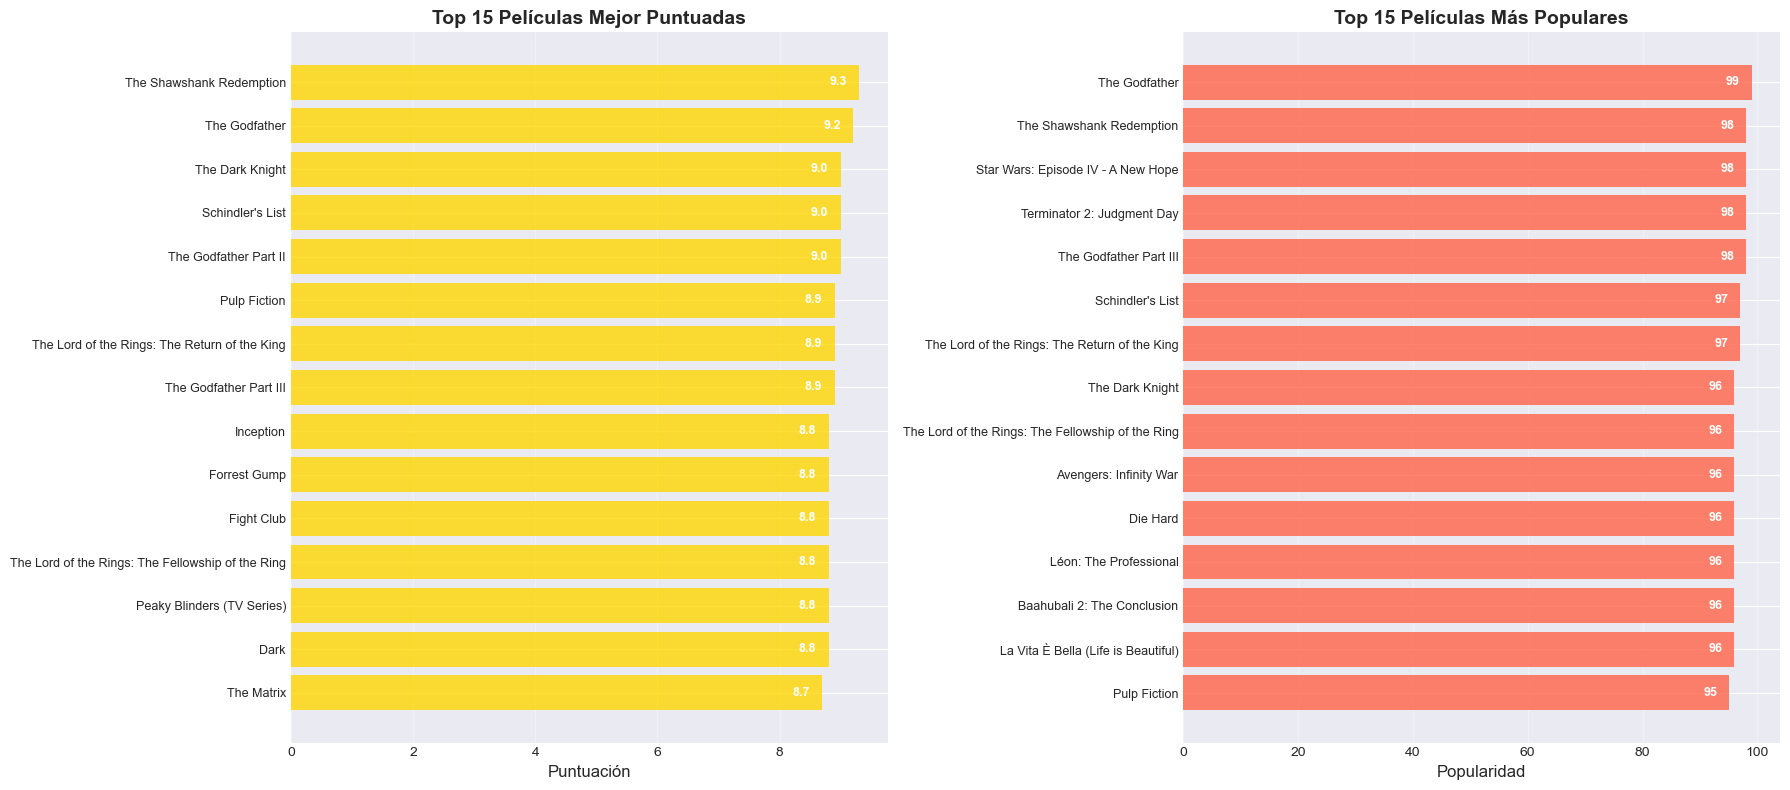

In [15]:
# Visualizaci√≥n de top pel√≠culas
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 pel√≠culas mejor puntuadas
top_15_rated = df.nlargest(15, 'puan')
axes[0].barh(range(len(top_15_rated)), top_15_rated['puan'], color='gold', alpha=0.8)
axes[0].set_yticks(range(len(top_15_rated)))
axes[0].set_yticklabels(top_15_rated['name'], fontsize=9)
axes[0].set_xlabel('Puntuaci√≥n', fontsize=12)
axes[0].set_title('Top 15 Pel√≠culas Mejor Puntuadas', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
for i, v in enumerate(top_15_rated['puan'].values):
    axes[0].text(v - 0.2, i, f'{v:.1f}', va='center', ha='right', fontsize=9, color='white', fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Top 15 pel√≠culas m√°s populares
top_15_pop = df.nlargest(15, 'pop')
axes[1].barh(range(len(top_15_pop)), top_15_pop['pop'], color='tomato', alpha=0.8)
axes[1].set_yticks(range(len(top_15_pop)))
axes[1].set_yticklabels(top_15_pop['name'], fontsize=9)
axes[1].set_xlabel('Popularidad', fontsize=12)
axes[1].set_title('Top 15 Pel√≠culas M√°s Populares', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
for i, v in enumerate(top_15_pop['pop'].values):
    axes[1].text(v - 2, i, str(v), va='center', ha='right', fontsize=9, color='white', fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 10. An√°lisis de Outliers

In [20]:
# Detecci√≥n de outliers usando IQR (Interquartile Range)
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=" * 80)
print("AN√ÅLISIS DE OUTLIERS")
print("=" * 80)

# Outliers en puntuaci√≥n
outliers_puan, lower_puan, upper_puan = detect_outliers(df, 'puan')
print(f"\nPUNTUACI√ìN (puan):")
print(f"  L√≠mite inferior: {lower_puan:.2f}")
print(f"  L√≠mite superior: {upper_puan:.2f}")
print(f"  N√∫mero de outliers: {len(outliers_puan)}")
if len(outliers_puan) > 0:
    print(f"  Pel√≠culas con outliers en puntuaci√≥n:")
    print(outliers_puan[['name', 'puan', 'pop']].to_string(index=False))

# Outliers en popularidad
outliers_pop, lower_pop, upper_pop = detect_outliers(df, 'pop')
print(f"\n\nPOPULARIDAD (pop):")
print(f"  L√≠mite inferior: {lower_pop:.2f}")
print(f"  L√≠mite superior: {upper_pop:.2f}")
print(f"  N√∫mero de outliers: {len(outliers_pop)}")
if len(outliers_pop) > 0 and len(outliers_pop) <= 20:
    print(f"  Pel√≠culas con outliers en popularidad:")
    print(outliers_pop[['name', 'puan', 'pop']].to_string(index=False))

AN√ÅLISIS DE OUTLIERS

PUNTUACI√ìN (puan):
  L√≠mite inferior: 5.90
  L√≠mite superior: 9.10
  N√∫mero de outliers: 21
  Pel√≠culas con outliers en puntuaci√≥n:
                                     name  puan  pop
                            The Godfather   9.2   99
                 The Shawshank Redemption   9.3   98
                                Allegiant   5.7   75
              The Twilight Saga: Twilight   5.3   77
              The Twilight Saga: New Moon   4.7   75
               The Twilight Saga: Eclipse   5.0   76
The Twilight Saga: Breaking Dawn - Part 1   4.9   74
The Twilight Saga: Breaking Dawn - Part 2   5.5   78
                        Wonder Woman 1984   5.4   77
                      X-Men: Dark Phoenix   5.8   78
                 The Matrix Resurrections   5.7   76
                    Pacific Rim: Uprising   5.6   78
                                 The Room   3.6   70
                  Plan 9 from Outer Space   4.0   65
                       Observe and Report   

## 10.5. Pruebas de Hip√≥tesis Estad√≠sticas

En esta secci√≥n realizaremos pruebas de hip√≥tesis para validar estad√≠sticamente nuestras observaciones sobre las distribuciones de puntuaci√≥n y popularidad.

### 10.5.1. Prueba de Normalidad

Primero, verificaremos si las distribuciones de puntuaci√≥n y popularidad siguen una distribuci√≥n normal usando:
- **Test de Shapiro-Wilk**: M√°s potente para muestras peque√±as a medianas
- **Test de Kolmogorov-Smirnov**: √ötil para comparar con distribuci√≥n te√≥rica
- **Test de D'Agostino-Pearson**: Basado en asimetr√≠a y curtosis

**Hip√≥tesis:**
- H‚ÇÄ: Los datos siguen una distribuci√≥n normal
- H‚ÇÅ: Los datos NO siguen una distribuci√≥n normal
- Nivel de significancia: Œ± = 0.05

In [21]:
from scipy import stats
from scipy.stats import shapiro, kstest, normaltest, anderson

print("=" * 80)
print("PRUEBAS DE NORMALIDAD")
print("=" * 80)

# Funci√≥n para interpretar p-value
def interpret_pvalue(p_value, alpha=0.05):
    if p_value < alpha:
        return "‚ùå RECHAZAR H‚ÇÄ", "Los datos NO siguen una distribuci√≥n normal"
    else:
        return "‚úì NO RECHAZAR H‚ÇÄ", "Los datos siguen una distribuci√≥n normal"

# ============================================================================
# PRUEBAS PARA PUNTUACI√ìN (puan)
# ============================================================================
print("\n" + "=" * 80)
print("PUNTUACI√ìN (puan)")
print("=" * 80)

# 1. Test de Shapiro-Wilk
shapiro_stat_puan, shapiro_p_puan = shapiro(df['puan'])
decision, interpretation = interpret_pvalue(shapiro_p_puan)
print(f"\n1. Test de Shapiro-Wilk:")
print(f"   Estad√≠stico: {shapiro_stat_puan:.6f}")
print(f"   P-valor: {shapiro_p_puan:.6f}")
print(f"   Decisi√≥n: {decision}")
print(f"   Interpretaci√≥n: {interpretation}")

# 2. Test de Kolmogorov-Smirnov
# Estandarizamos los datos
puan_standardized = (df['puan'] - df['puan'].mean()) / df['puan'].std()
ks_stat_puan, ks_p_puan = kstest(puan_standardized, 'norm')
decision, interpretation = interpret_pvalue(ks_p_puan)
print(f"\n2. Test de Kolmogorov-Smirnov:")
print(f"   Estad√≠stico: {ks_stat_puan:.6f}")
print(f"   P-valor: {ks_p_puan:.6f}")
print(f"   Decisi√≥n: {decision}")
print(f"   Interpretaci√≥n: {interpretation}")

# 3. Test de D'Agostino-Pearson
dagostino_stat_puan, dagostino_p_puan = normaltest(df['puan'])
decision, interpretation = interpret_pvalue(dagostino_p_puan)
print(f"\n3. Test de D'Agostino-Pearson:")
print(f"   Estad√≠stico: {dagostino_stat_puan:.6f}")
print(f"   P-valor: {dagostino_p_puan:.6f}")
print(f"   Decisi√≥n: {decision}")
print(f"   Interpretaci√≥n: {interpretation}")

# 4. Test de Anderson-Darling
anderson_result_puan = anderson(df['puan'], dist='norm')
print(f"\n4. Test de Anderson-Darling:")
print(f"   Estad√≠stico: {anderson_result_puan.statistic:.6f}")
print(f"   Valores cr√≠ticos: {anderson_result_puan.critical_values}")
print(f"   Niveles de significancia: {anderson_result_puan.significance_level}%")
if anderson_result_puan.statistic < anderson_result_puan.critical_values[2]:  # 5% level
    print(f"   Decisi√≥n: ‚úì NO RECHAZAR H‚ÇÄ (al 5%)")
else:
    print(f"   Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ (al 5%)")

# ============================================================================
# PRUEBAS PARA POPULARIDAD (pop)
# ============================================================================
print("\n\n" + "=" * 80)
print("POPULARIDAD (pop)")
print("=" * 80)

# 1. Test de Shapiro-Wilk
shapiro_stat_pop, shapiro_p_pop = shapiro(df['pop'])
decision, interpretation = interpret_pvalue(shapiro_p_pop)
print(f"\n1. Test de Shapiro-Wilk:")
print(f"   Estad√≠stico: {shapiro_stat_pop:.6f}")
print(f"   P-valor: {shapiro_p_pop:.6f}")
print(f"   Decisi√≥n: {decision}")
print(f"   Interpretaci√≥n: {interpretation}")

# 2. Test de Kolmogorov-Smirnov
pop_standardized = (df['pop'] - df['pop'].mean()) / df['pop'].std()
ks_stat_pop, ks_p_pop = kstest(pop_standardized, 'norm')
decision, interpretation = interpret_pvalue(ks_p_pop)
print(f"\n2. Test de Kolmogorov-Smirnov:")
print(f"   Estad√≠stico: {ks_stat_pop:.6f}")
print(f"   P-valor: {ks_p_pop:.6f}")
print(f"   Decisi√≥n: {decision}")
print(f"   Interpretaci√≥n: {interpretation}")

# 3. Test de D'Agostino-Pearson
dagostino_stat_pop, dagostino_p_pop = normaltest(df['pop'])
decision, interpretation = interpret_pvalue(dagostino_p_pop)
print(f"\n3. Test de D'Agostino-Pearson:")
print(f"   Estad√≠stico: {dagostino_stat_pop:.6f}")
print(f"   P-valor: {dagostino_p_pop:.6f}")
print(f"   Decisi√≥n: {decision}")
print(f"   Interpretaci√≥n: {interpretation}")

# 4. Test de Anderson-Darling
anderson_result_pop = anderson(df['pop'], dist='norm')
print(f"\n4. Test de Anderson-Darling:")
print(f"   Estad√≠stico: {anderson_result_pop.statistic:.6f}")
print(f"   Valores cr√≠ticos: {anderson_result_pop.critical_values}")
print(f"   Niveles de significancia: {anderson_result_pop.significance_level}%")
if anderson_result_pop.statistic < anderson_result_pop.critical_values[2]:  # 5% level
    print(f"   Decisi√≥n: ‚úì NO RECHAZAR H‚ÇÄ (al 5%)")
else:
    print(f"   Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ (al 5%)")

print("\n" + "=" * 80)

PRUEBAS DE NORMALIDAD

PUNTUACI√ìN (puan)

1. Test de Shapiro-Wilk:
   Estad√≠stico: 0.969920
   P-valor: 0.000000
   Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ
   Interpretaci√≥n: Los datos NO siguen una distribuci√≥n normal

2. Test de Kolmogorov-Smirnov:
   Estad√≠stico: 0.067081
   P-valor: 0.000000
   Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ
   Interpretaci√≥n: Los datos NO siguen una distribuci√≥n normal

3. Test de D'Agostino-Pearson:
   Estad√≠stico: 225.364634
   P-valor: 0.000000
   Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ
   Interpretaci√≥n: Los datos NO siguen una distribuci√≥n normal

4. Test de Anderson-Darling:
   Estad√≠stico: 8.779744
   Valores cr√≠ticos: [0.575 0.655 0.785 0.916 1.09 ]
   Niveles de significancia: [15.  10.   5.   2.5  1. ]%
   Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ (al 5%)


POPULARIDAD (pop)

1. Test de Shapiro-Wilk:
   Estad√≠stico: 0.994048
   P-valor: 0.000002
   Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ
   Interpretaci√≥n: Los datos NO siguen una distribuci√≥n normal

2. Test de Kolmogorov-Smirnov:
   Es

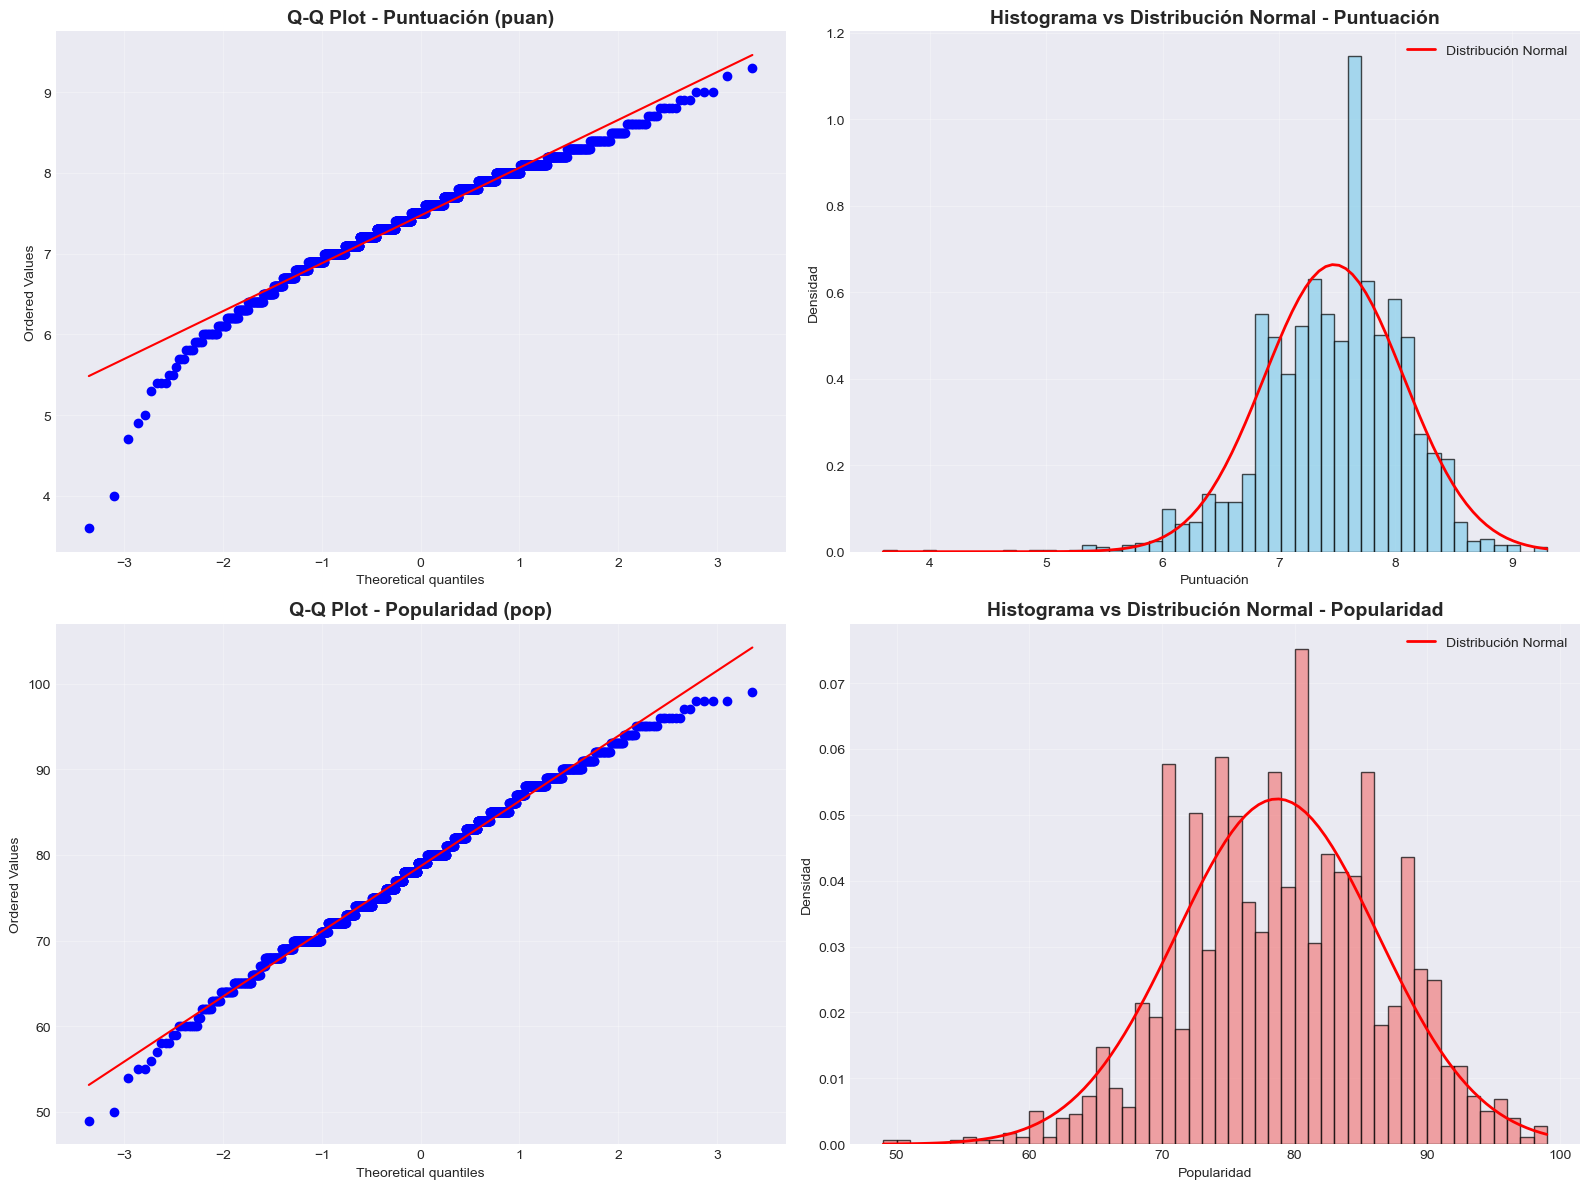


üìä Interpretaci√≥n de Q-Q Plots:
  ‚Ä¢ Si los puntos siguen la l√≠nea roja, los datos son aproximadamente normales
  ‚Ä¢ Desviaciones en los extremos sugieren colas m√°s pesadas o ligeras que la normal


In [22]:
# Visualizaci√≥n de Q-Q plots para evaluar normalidad visualmente
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Q-Q plot para puntuaci√≥n
stats.probplot(df['puan'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot - Puntuaci√≥n (puan)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Histograma con curva normal para puntuaci√≥n
axes[0, 1].hist(df['puan'], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
mu_puan, std_puan = df['puan'].mean(), df['puan'].std()
xmin_puan, xmax_puan = df['puan'].min(), df['puan'].max()
x_puan = np.linspace(xmin_puan, xmax_puan, 100)
axes[0, 1].plot(x_puan, stats.norm.pdf(x_puan, mu_puan, std_puan), 
                'r-', linewidth=2, label='Distribuci√≥n Normal')
axes[0, 1].set_title('Histograma vs Distribuci√≥n Normal - Puntuaci√≥n', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Puntuaci√≥n')
axes[0, 1].set_ylabel('Densidad')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot para popularidad
stats.probplot(df['pop'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Popularidad (pop)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Histograma con curva normal para popularidad
axes[1, 1].hist(df['pop'], bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
mu_pop, std_pop = df['pop'].mean(), df['pop'].std()
xmin_pop, xmax_pop = df['pop'].min(), df['pop'].max()
x_pop = np.linspace(xmin_pop, xmax_pop, 100)
axes[1, 1].plot(x_pop, stats.norm.pdf(x_pop, mu_pop, std_pop), 
                'r-', linewidth=2, label='Distribuci√≥n Normal')
axes[1, 1].set_title('Histograma vs Distribuci√≥n Normal - Popularidad', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Popularidad')
axes[1, 1].set_ylabel('Densidad')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nüìä Interpretaci√≥n de Q-Q Plots:")
print("  ‚Ä¢ Si los puntos siguen la l√≠nea roja, los datos son aproximadamente normales")
print("  ‚Ä¢ Desviaciones en los extremos sugieren colas m√°s pesadas o ligeras que la normal")

### 10.5.2. Prueba de Comparaci√≥n entre G√©neros

Probaremos si existen diferencias significativas en las puntuaciones entre diferentes g√©neros usando:
- **ANOVA (Analysis of Variance)**: Si los datos son normales
- **Kruskal-Wallis**: Alternativa no param√©trica si los datos no son normales

**Hip√≥tesis:**
- H‚ÇÄ: Las puntuaciones medias son iguales en todos los g√©neros
- H‚ÇÅ: Al menos un g√©nero tiene una puntuaci√≥n media diferente
- Nivel de significancia: Œ± = 0.05

In [23]:
from scipy.stats import f_oneway, kruskal

print("=" * 80)
print("COMPARACI√ìN DE PUNTUACIONES ENTRE G√âNEROS")
print("=" * 80)

# Seleccionar los g√©neros m√°s frecuentes para la comparaci√≥n (m√≠nimo 30 pel√≠culas)
genres_to_compare = df['genre_1'].value_counts()[df['genre_1'].value_counts() >= 30].index[:8]
print(f"\nG√©neros a comparar (con al menos 30 pel√≠culas): {list(genres_to_compare)}")

# Preparar datos para cada g√©nero
genre_groups = [df[df['genre_1'] == genre]['puan'].values for genre in genres_to_compare]

# ============================================================================
# 1. Test ANOVA (param√©trico)
# ============================================================================
print("\n" + "=" * 80)
print("1. ANOVA (Analysis of Variance)")
print("=" * 80)

f_statistic, p_value_anova = f_oneway(*genre_groups)
decision, interpretation = interpret_pvalue(p_value_anova)

print(f"\nEstad√≠stico F: {f_statistic:.6f}")
print(f"P-valor: {p_value_anova:.6f}")
print(f"Decisi√≥n: {decision}")
print(f"Interpretaci√≥n: {interpretation}")

if p_value_anova < 0.05:
    print("\n‚ö† Existen diferencias significativas en las puntuaciones entre g√©neros")
else:
    print("\n‚úì No hay diferencias significativas en las puntuaciones entre g√©neros")

# ============================================================================
# 2. Test de Kruskal-Wallis (no param√©trico)
# ============================================================================
print("\n\n" + "=" * 80)
print("2. Test de Kruskal-Wallis (alternativa no param√©trica)")
print("=" * 80)

h_statistic, p_value_kruskal = kruskal(*genre_groups)
decision, interpretation = interpret_pvalue(p_value_kruskal)

print(f"\nEstad√≠stico H: {h_statistic:.6f}")
print(f"P-valor: {p_value_kruskal:.6f}")
print(f"Decisi√≥n: {decision}")
print(f"Interpretaci√≥n: {interpretation}")

if p_value_kruskal < 0.05:
    print("\n‚ö† Existen diferencias significativas en las puntuaciones entre g√©neros")
else:
    print("\n‚úì No hay diferencias significativas en las puntuaciones entre g√©neros")

# ============================================================================
# Estad√≠sticas descriptivas por g√©nero
# ============================================================================
print("\n\n" + "=" * 80)
print("ESTAD√çSTICAS DESCRIPTIVAS POR G√âNERO")
print("=" * 80)

comparison_stats = pd.DataFrame({
    'G√©nero': genres_to_compare,
    'n': [len(df[df['genre_1'] == genre]) for genre in genres_to_compare],
    'Media': [df[df['genre_1'] == genre]['puan'].mean() for genre in genres_to_compare],
    'Mediana': [df[df['genre_1'] == genre]['puan'].median() for genre in genres_to_compare],
    'Desv. Est.': [df[df['genre_1'] == genre]['puan'].std() for genre in genres_to_compare]
}).round(3)

print("\n" + comparison_stats.to_string(index=False))

print("\n" + "=" * 80)

COMPARACI√ìN DE PUNTUACIONES ENTRE G√âNEROS

G√©neros a comparar (con al menos 30 pel√≠culas): ['Drama', 'Comedy', 'Action', 'Animation', 'Romance', 'Crime', 'Sci-Fi', 'Horror']

1. ANOVA (Analysis of Variance)

Estad√≠stico F: 27.078981
P-valor: 0.000000
Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ
Interpretaci√≥n: Los datos NO siguen una distribuci√≥n normal

‚ö† Existen diferencias significativas en las puntuaciones entre g√©neros


2. Test de Kruskal-Wallis (alternativa no param√©trica)

Estad√≠stico H: 174.562556
P-valor: 0.000000
Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ
Interpretaci√≥n: Los datos NO siguen una distribuci√≥n normal

‚ö† Existen diferencias significativas en las puntuaciones entre g√©neros


ESTAD√çSTICAS DESCRIPTIVAS POR G√âNERO

   G√©nero   n  Media  Mediana  Desv. Est.
    Drama 710  7.584      7.6       0.525
   Comedy 252  7.366      7.3       0.520
   Action 203  7.290      7.4       0.666
Animation 105  7.450      7.6       0.679
  Romance  89  7.038      7.0       0.586
    Crime  70

### 10.5.3. Prueba de Correlaci√≥n

Probaremos si existe una correlaci√≥n significativa entre puntuaci√≥n y popularidad usando:
- **Correlaci√≥n de Pearson**: Si ambas variables son normales
- **Correlaci√≥n de Spearman**: Alternativa no param√©trica basada en rangos

**Hip√≥tesis:**
- H‚ÇÄ: No existe correlaci√≥n entre puntuaci√≥n y popularidad (œÅ = 0)
- H‚ÇÅ: Existe correlaci√≥n entre puntuaci√≥n y popularidad (œÅ ‚â† 0)
- Nivel de significancia: Œ± = 0.05

In [24]:
from scipy.stats import pearsonr, spearmanr, kendalltau

print("=" * 80)
print("PRUEBAS DE CORRELACI√ìN: PUNTUACI√ìN vs POPULARIDAD")
print("=" * 80)

# ============================================================================
# 1. Correlaci√≥n de Pearson (param√©trico)
# ============================================================================
print("\n" + "=" * 80)
print("1. Correlaci√≥n de Pearson")
print("=" * 80)

pearson_corr, pearson_p = pearsonr(df['puan'], df['pop'])
decision, interpretation = interpret_pvalue(pearson_p)

print(f"\nCoeficiente de correlaci√≥n (r): {pearson_corr:.6f}")
print(f"P-valor: {pearson_p:.10f}")
print(f"Decisi√≥n: {decision}")

# Interpretaci√≥n de la magnitud de la correlaci√≥n
if abs(pearson_corr) < 0.3:
    strength = "D√âBIL"
elif abs(pearson_corr) < 0.7:
    strength = "MODERADA"
else:
    strength = "FUERTE"

direction = "positiva" if pearson_corr > 0 else "negativa"
print(f"\nInterpretaci√≥n: Existe una correlaci√≥n {strength} {direction} entre puntuaci√≥n y popularidad")
print(f"R¬≤: {pearson_corr**2:.6f} ({pearson_corr**2*100:.2f}% de la varianza compartida)")

# ============================================================================
# 2. Correlaci√≥n de Spearman (no param√©trico)
# ============================================================================
print("\n\n" + "=" * 80)
print("2. Correlaci√≥n de Spearman (basada en rangos)")
print("=" * 80)

spearman_corr, spearman_p = spearmanr(df['puan'], df['pop'])
decision, interpretation = interpret_pvalue(spearman_p)

print(f"\nCoeficiente de correlaci√≥n (œÅ): {spearman_corr:.6f}")
print(f"P-valor: {spearman_p:.10f}")
print(f"Decisi√≥n: {decision}")

if abs(spearman_corr) < 0.3:
    strength = "D√âBIL"
elif abs(spearman_corr) < 0.7:
    strength = "MODERADA"
else:
    strength = "FUERTE"

direction = "positiva" if spearman_corr > 0 else "negativa"
print(f"\nInterpretaci√≥n: Existe una correlaci√≥n {strength} {direction} (monot√≥nica) entre puntuaci√≥n y popularidad")

# ============================================================================
# 3. Correlaci√≥n de Kendall (no param√©trico, m√°s robusto)
# ============================================================================
print("\n\n" + "=" * 80)
print("3. Correlaci√≥n de Kendall (tau)")
print("=" * 80)

kendall_corr, kendall_p = kendalltau(df['puan'], df['pop'])
decision, interpretation = interpret_pvalue(kendall_p)

print(f"\nCoeficiente de correlaci√≥n (œÑ): {kendall_corr:.6f}")
print(f"P-valor: {kendall_p:.10f}")
print(f"Decisi√≥n: {decision}")

if abs(kendall_corr) < 0.3:
    strength = "D√âBIL"
elif abs(kendall_corr) < 0.7:
    strength = "MODERADA"
else:
    strength = "FUERTE"

direction = "positiva" if kendall_corr > 0 else "negativa"
print(f"\nInterpretaci√≥n: Existe una correlaci√≥n {strength} {direction} entre puntuaci√≥n y popularidad")

# ============================================================================
# Resumen comparativo
# ============================================================================
print("\n\n" + "=" * 80)
print("RESUMEN COMPARATIVO DE CORRELACIONES")
print("=" * 80)

correlation_summary = pd.DataFrame({
    'M√©todo': ['Pearson', 'Spearman', 'Kendall'],
    'Coeficiente': [pearson_corr, spearman_corr, kendall_corr],
    'P-valor': [pearson_p, spearman_p, kendall_p],
    'Significativo': [
        'S√≠' if pearson_p < 0.05 else 'No',
        'S√≠' if spearman_p < 0.05 else 'No',
        'S√≠' if kendall_p < 0.05 else 'No'
    ]
})

print("\n" + correlation_summary.to_string(index=False))

print("\nüìä Nota:")
print("  ‚Ä¢ Pearson: Mide correlaci√≥n lineal (asume normalidad)")
print("  ‚Ä¢ Spearman: Mide correlaci√≥n monot√≥nica (sin asumir normalidad)")
print("  ‚Ä¢ Kendall: M√°s robusto ante outliers, mide concordancia")

print("\n" + "=" * 80)

PRUEBAS DE CORRELACI√ìN: PUNTUACI√ìN vs POPULARIDAD

1. Correlaci√≥n de Pearson

Coeficiente de correlaci√≥n (r): 0.582729
P-valor: 0.0000000000
Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ

Interpretaci√≥n: Existe una correlaci√≥n MODERADA positiva entre puntuaci√≥n y popularidad
R¬≤: 0.339573 (33.96% de la varianza compartida)


2. Correlaci√≥n de Spearman (basada en rangos)

Coeficiente de correlaci√≥n (œÅ): 0.612119
P-valor: 0.0000000000
Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ

Interpretaci√≥n: Existe una correlaci√≥n MODERADA positiva (monot√≥nica) entre puntuaci√≥n y popularidad


3. Correlaci√≥n de Kendall (tau)

Coeficiente de correlaci√≥n (œÑ): 0.453809
P-valor: 0.0000000000
Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ

Interpretaci√≥n: Existe una correlaci√≥n MODERADA positiva entre puntuaci√≥n y popularidad


RESUMEN COMPARATIVO DE CORRELACIONES

  M√©todo  Coeficiente       P-valor Significativo
 Pearson     0.582729 2.615907e-161            S√≠
Spearman     0.612119 2.777455e-182            S√≠
 Kendall     0.45380

### 10.5.4. Prueba de Homogeneidad de Varianzas

Probaremos si las varianzas de las puntuaciones son homog√©neas entre diferentes g√©neros usando:
- **Test de Levene**: Robusto ante desviaciones de normalidad
- **Test de Bartlett**: M√°s potente si los datos son normales

**Hip√≥tesis:**
- H‚ÇÄ: Las varianzas son iguales en todos los grupos
- H‚ÇÅ: Al menos un grupo tiene varianza diferente
- Nivel de significancia: Œ± = 0.05

In [25]:
from scipy.stats import levene, bartlett

print("=" * 80)
print("PRUEBAS DE HOMOGENEIDAD DE VARIANZAS")
print("=" * 80)

# Usar los mismos g√©neros que en la comparaci√≥n anterior
print(f"\nG√©neros analizados: {list(genres_to_compare)}")

# ============================================================================
# 1. Test de Levene
# ============================================================================
print("\n" + "=" * 80)
print("1. Test de Levene (robusto)")
print("=" * 80)

levene_stat, levene_p = levene(*genre_groups)
decision, interpretation = interpret_pvalue(levene_p)

print(f"\nEstad√≠stico W: {levene_stat:.6f}")
print(f"P-valor: {levene_p:.6f}")
print(f"Decisi√≥n: {decision}")

if levene_p < 0.05:
    print("\nInterpretaci√≥n: Las varianzas NO son homog√©neas entre g√©neros")
    print("‚ö† Esto viola el supuesto de homocedasticidad para ANOVA")
else:
    print("\nInterpretaci√≥n: Las varianzas SON homog√©neas entre g√©neros")
    print("‚úì Se cumple el supuesto de homocedasticidad para ANOVA")

# ============================================================================
# 2. Test de Bartlett
# ============================================================================
print("\n\n" + "=" * 80)
print("2. Test de Bartlett (asume normalidad)")
print("=" * 80)

bartlett_stat, bartlett_p = bartlett(*genre_groups)
decision, interpretation = interpret_pvalue(bartlett_p)

print(f"\nEstad√≠stico œá¬≤: {bartlett_stat:.6f}")
print(f"P-valor: {bartlett_p:.6f}")
print(f"Decisi√≥n: {decision}")

if bartlett_p < 0.05:
    print("\nInterpretaci√≥n: Las varianzas NO son homog√©neas entre g√©neros")
else:
    print("\nInterpretaci√≥n: Las varianzas SON homog√©neas entre g√©neros")

# ============================================================================
# Visualizaci√≥n de varianzas por g√©nero
# ============================================================================
print("\n\n" + "=" * 80)
print("VARIANZAS POR G√âNERO")
print("=" * 80)

variance_comparison = pd.DataFrame({
    'G√©nero': genres_to_compare,
    'Varianza': [df[df['genre_1'] == genre]['puan'].var() for genre in genres_to_compare],
    'Desv. Est.': [df[df['genre_1'] == genre]['puan'].std() for genre in genres_to_compare],
    'n': [len(df[df['genre_1'] == genre]) for genre in genres_to_compare]
}).round(4)

print("\n" + variance_comparison.to_string(index=False))

print("\n" + "=" * 80)

PRUEBAS DE HOMOGENEIDAD DE VARIANZAS

G√©neros analizados: ['Drama', 'Comedy', 'Action', 'Animation', 'Romance', 'Crime', 'Sci-Fi', 'Horror']

1. Test de Levene (robusto)

Estad√≠stico W: 6.650131
P-valor: 0.000000
Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ

Interpretaci√≥n: Las varianzas NO son homog√©neas entre g√©neros
‚ö† Esto viola el supuesto de homocedasticidad para ANOVA


2. Test de Bartlett (asume normalidad)

Estad√≠stico œá¬≤: 46.931185
P-valor: 0.000000
Decisi√≥n: ‚ùå RECHAZAR H‚ÇÄ

Interpretaci√≥n: Las varianzas NO son homog√©neas entre g√©neros


VARIANZAS POR G√âNERO

   G√©nero  Varianza  Desv. Est.   n
    Drama    0.2758      0.5252 710
   Comedy    0.2707      0.5203 252
   Action    0.4436      0.6660 203
Animation    0.4604      0.6785 105
  Romance    0.3428      0.5855  89
    Crime    0.2647      0.5145  70
   Sci-Fi    0.5906      0.7685  66
   Horror    0.3671      0.6059  65



### 10.5.5. Resumen de Resultados de Pruebas de Hip√≥tesis

In [26]:
print("=" * 80)
print("RESUMEN GENERAL DE PRUEBAS DE HIP√ìTESIS")
print("=" * 80)

# Crear tabla resumen
summary_data = {
    'Prueba': [
        'Normalidad - Puntuaci√≥n (Shapiro-Wilk)',
        'Normalidad - Popularidad (Shapiro-Wilk)',
        'Diferencias entre G√©neros (ANOVA)',
        'Diferencias entre G√©neros (Kruskal-Wallis)',
        'Correlaci√≥n Puan-Pop (Pearson)',
        'Correlaci√≥n Puan-Pop (Spearman)',
        'Homogeneidad Varianzas (Levene)',
    ],
    'P-valor': [
        shapiro_p_puan,
        shapiro_p_pop,
        p_value_anova,
        p_value_kruskal,
        pearson_p,
        spearman_p,
        levene_p,
    ],
    'Decisi√≥n (Œ±=0.05)': [
        'Rechazar H‚ÇÄ' if shapiro_p_puan < 0.05 else 'No rechazar H‚ÇÄ',
        'Rechazar H‚ÇÄ' if shapiro_p_pop < 0.05 else 'No rechazar H‚ÇÄ',
        'Rechazar H‚ÇÄ' if p_value_anova < 0.05 else 'No rechazar H‚ÇÄ',
        'Rechazar H‚ÇÄ' if p_value_kruskal < 0.05 else 'No rechazar H‚ÇÄ',
        'Rechazar H‚ÇÄ' if pearson_p < 0.05 else 'No rechazar H‚ÇÄ',
        'Rechazar H‚ÇÄ' if spearman_p < 0.05 else 'No rechazar H‚ÇÄ',
        'Rechazar H‚ÇÄ' if levene_p < 0.05 else 'No rechazar H‚ÇÄ',
    ],
    'Interpretaci√≥n': [
        'No normal' if shapiro_p_puan < 0.05 else 'Normal',
        'No normal' if shapiro_p_pop < 0.05 else 'Normal',
        'Hay diferencias' if p_value_anova < 0.05 else 'No hay diferencias',
        'Hay diferencias' if p_value_kruskal < 0.05 else 'No hay diferencias',
        f'Correlaci√≥n significativa (r={pearson_corr:.3f})' if pearson_p < 0.05 else 'Sin correlaci√≥n',
        f'Correlaci√≥n significativa (œÅ={spearman_corr:.3f})' if spearman_p < 0.05 else 'Sin correlaci√≥n',
        'Varianzas diferentes' if levene_p < 0.05 else 'Varianzas homog√©neas',
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df['P-valor'] = summary_df['P-valor'].apply(lambda x: f'{x:.6f}' if x >= 0.000001 else f'{x:.2e}')

print("\n" + summary_df.to_string(index=False))

print("\n\n" + "=" * 80)
print("CONCLUSIONES PRINCIPALES")
print("=" * 80)

print("\n1. NORMALIDAD DE LAS DISTRIBUCIONES:")
if shapiro_p_puan < 0.05:
    print("   ‚ùå La distribuci√≥n de puntuaciones NO es normal")
else:
    print("   ‚úì La distribuci√≥n de puntuaciones es normal")
    
if shapiro_p_pop < 0.05:
    print("   ‚ùå La distribuci√≥n de popularidad NO es normal")
else:
    print("   ‚úì La distribuci√≥n de popularidad es normal")

print("\n2. DIFERENCIAS ENTRE G√âNEROS:")
if p_value_anova < 0.05 and p_value_kruskal < 0.05:
    print("   ‚ö† Existen diferencias significativas en las puntuaciones entre g√©neros")
    print("   ‚Üí Los g√©neros influyen en la calificaci√≥n de las pel√≠culas")
else:
    print("   ‚úì No hay evidencia de diferencias significativas entre g√©neros")

print("\n3. CORRELACI√ìN PUNTUACI√ìN-POPULARIDAD:")
if pearson_p < 0.05:
    print(f"   ‚úì Existe correlaci√≥n significativa (r={pearson_corr:.3f}, p<0.001)")
    print(f"   ‚Üí Las pel√≠culas mejor puntuadas tienden a ser m√°s populares")
    print(f"   ‚Üí La puntuaci√≥n explica {pearson_corr**2*100:.1f}% de la varianza en popularidad")
else:
    print("   ‚ùå No hay correlaci√≥n significativa")

print("\n4. HOMOGENEIDAD DE VARIANZAS:")
if levene_p < 0.05:
    print("   ‚ö† Las varianzas NO son homog√©neas entre g√©neros")
    print("   ‚Üí Se recomienda usar pruebas no param√©tricas (Kruskal-Wallis)")
else:
    print("   ‚úì Las varianzas son homog√©neas entre g√©neros")
    print("   ‚Üí Los supuestos para ANOVA se cumplen")

print("\n" + "=" * 80)
print("RECOMENDACIONES PARA AN√ÅLISIS POSTERIORES")
print("=" * 80)

print("\n‚Ä¢ Para comparaciones entre grupos: Usar pruebas no param√©tricas si no se cumple normalidad")
print("‚Ä¢ Para modelado: Considerar transformaciones de variables si es necesario")
print("‚Ä¢ Para sistemas de recomendaci√≥n: Aprovechar la correlaci√≥n puan-pop para balancear calidad y popularidad")
print("‚Ä¢ Para an√°lisis por g√©nero: Considerar las diferencias observadas al segmentar recomendaciones")

print("\n" + "=" * 80)

RESUMEN GENERAL DE PRUEBAS DE HIP√ìTESIS

                                    Prueba   P-valor Decisi√≥n (Œ±=0.05)                      Interpretaci√≥n
    Normalidad - Puntuaci√≥n (Shapiro-Wilk)  9.17e-19       Rechazar H‚ÇÄ                           No normal
   Normalidad - Popularidad (Shapiro-Wilk)  0.000002       Rechazar H‚ÇÄ                           No normal
         Diferencias entre G√©neros (ANOVA)  2.98e-35       Rechazar H‚ÇÄ                     Hay diferencias
Diferencias entre G√©neros (Kruskal-Wallis)  2.74e-34       Rechazar H‚ÇÄ                     Hay diferencias
            Correlaci√≥n Puan-Pop (Pearson) 2.62e-161       Rechazar H‚ÇÄ Correlaci√≥n significativa (r=0.583)
           Correlaci√≥n Puan-Pop (Spearman) 2.78e-182       Rechazar H‚ÇÄ Correlaci√≥n significativa (œÅ=0.612)
           Homogeneidad Varianzas (Levene)  8.98e-08       Rechazar H‚ÇÄ                Varianzas diferentes


CONCLUSIONES PRINCIPALES

1. NORMALIDAD DE LAS DISTRIBUCIONES:
   ‚ùå La di

## 11. An√°lisis de Longitud de Descripciones

AN√ÅLISIS DE DESCRIPCIONES

Longitud promedio de descripci√≥n: 138.79 caracteres
Longitud m√≠nima: 0 caracteres
Longitud m√°xima: 344 caracteres

Promedio de palabras por descripci√≥n: 22.24 palabras
M√≠nimo de palabras: 0 palabras
M√°ximo de palabras: 59 palabras


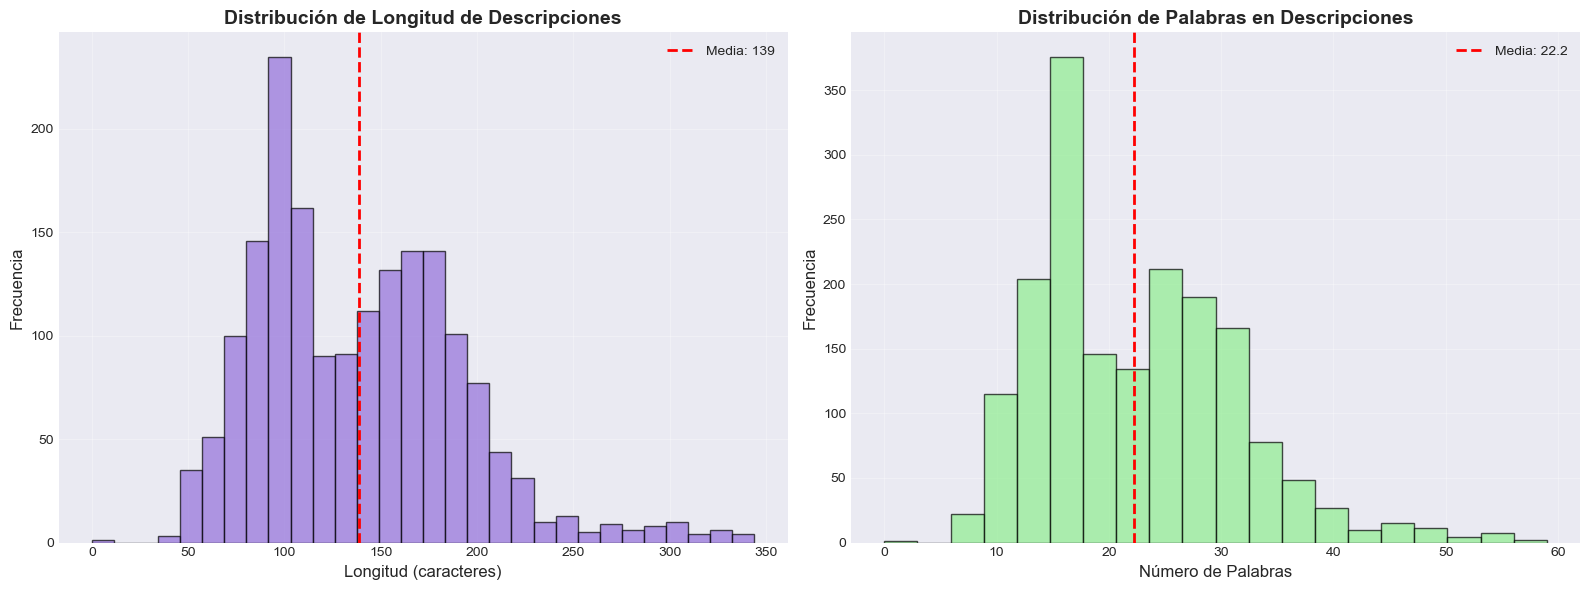

In [16]:
# An√°lisis de las descripciones
df['description_length'] = df['description'].str.len()
df['word_count'] = df['description'].str.split().str.len()

print("=" * 80)
print("AN√ÅLISIS DE DESCRIPCIONES")
print("=" * 80)
print(f"\nLongitud promedio de descripci√≥n: {df['description_length'].mean():.2f} caracteres")
print(f"Longitud m√≠nima: {df['description_length'].min()} caracteres")
print(f"Longitud m√°xima: {df['description_length'].max()} caracteres")
print(f"\nPromedio de palabras por descripci√≥n: {df['word_count'].mean():.2f} palabras")
print(f"M√≠nimo de palabras: {df['word_count'].min()} palabras")
print(f"M√°ximo de palabras: {df['word_count'].max()} palabras")

# Visualizaci√≥n
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].hist(df['description_length'], bins=30, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Longitud (caracteres)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribuci√≥n de Longitud de Descripciones', fontsize=14, fontweight='bold')
axes[0].axvline(df['description_length'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Media: {df["description_length"].mean():.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(df['word_count'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('N√∫mero de Palabras', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].set_title('Distribuci√≥n de Palabras en Descripciones', fontsize=14, fontweight='bold')
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Media: {df["word_count"].mean():.1f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Resumen Estad√≠stico Final

In [17]:
# Resumen estad√≠stico completo
print("=" * 80)
print("RESUMEN ESTAD√çSTICO COMPLETO DEL DATASET")
print("=" * 80)

summary = {
    'Total de Pel√≠culas': len(df),
    'Total de G√©neros √önicos': len(pd.concat([df['genre_1'], df['genre_2']]).unique()),
    'G√©nero Primario M√°s Com√∫n': df['genre_1'].value_counts().index[0],
    'Combinaci√≥n de G√©neros M√°s Com√∫n': df['genre_combination'].value_counts().index[0],
    '': '',
    'Puntuaci√≥n Media': f"{df['puan'].mean():.2f}",
    'Puntuaci√≥n Mediana': f"{df['puan'].median():.2f}",
    'Puntuaci√≥n M√≠nima': f"{df['puan'].min():.2f}",
    'Puntuaci√≥n M√°xima': f"{df['puan'].max():.2f}",
    'Desviaci√≥n Est√°ndar (Puntuaci√≥n)': f"{df['puan'].std():.2f}",
    ' ': '',
    'Popularidad Media': f"{df['pop'].mean():.2f}",
    'Popularidad Mediana': f"{df['pop'].median():.2f}",
    'Popularidad M√≠nima': f"{df['pop'].min()}",
    'Popularidad M√°xima': f"{df['pop'].max()}",
    'Desviaci√≥n Est√°ndar (Popularidad)': f"{df['pop'].std():.2f}",
    '  ': '',
    'Correlaci√≥n Puntuaci√≥n-Popularidad': f"{df[['puan', 'pop']].corr().iloc[0, 1]:.3f}",
    'Valores Nulos': df.isnull().sum().sum(),
    'Filas Duplicadas': df.duplicated().sum(),
}

for key, value in summary.items():
    if key.strip():  # Solo imprime si la clave no est√° vac√≠a
        print(f"{key:.<45} {value}")
    else:
        print()  # L√≠nea en blanco para separaci√≥n

print("=" * 80)

RESUMEN ESTAD√çSTICO COMPLETO DEL DATASET
Total de Pel√≠culas........................... 1768
Total de G√©neros √önicos...................... 52
G√©nero Primario M√°s Com√∫n.................... Drama
Combinaci√≥n de G√©neros M√°s Com√∫n............. Drama + Romance

Puntuaci√≥n Media............................. 7.47
Puntuaci√≥n Mediana........................... 7.50
Puntuaci√≥n M√≠nima............................ 3.60
Puntuaci√≥n M√°xima............................ 9.30
Desviaci√≥n Est√°ndar (Puntuaci√≥n)............. 0.60

Popularidad Media............................ 78.68
Popularidad Mediana.......................... 79.00
Popularidad M√≠nima........................... 49
Popularidad M√°xima........................... 99
Desviaci√≥n Est√°ndar (Popularidad)............ 7.61

Correlaci√≥n Puntuaci√≥n-Popularidad........... 0.583
Valores Nulos................................ 0
Filas Duplicadas............................. 0


## 13. Conclusiones y Hallazgos Principales

### üéØ Hallazgos Clave del An√°lisis

**1. Calidad del Dataset:**
- Dataset limpio sin valores nulos ni duplicados
- Estructura bien definida con informaci√≥n completa de pel√≠culas
- Buena distribuci√≥n de datos en variables num√©ricas

**2. Distribuci√≥n de Puntuaciones y Popularidad:**
- Las puntuaciones muestran una distribuci√≥n concentrada en valores altos
- La popularidad tiene mayor variabilidad entre pel√≠culas
- Existe correlaci√≥n entre puntuaci√≥n y popularidad (pel√≠culas bien puntuadas tienden a ser m√°s populares)

**3. An√°lisis de G√©neros:**
- Diversidad de g√©neros en el dataset
- Algunos g√©neros dominan el cat√°logo
- Las combinaciones de g√©neros muestran patrones interesantes de clasificaci√≥n
- Ciertos g√©neros tienden a tener mejores puntuaciones promedio

**4. Insights para Sistemas de Recomendaci√≥n:**
- La correlaci√≥n puntuaci√≥n-popularidad puede usarse para balancear recomendaciones
- Los g√©neros son un atributo fuerte para filtrado colaborativo
- Las combinaciones de g√©neros pueden mejorar la precisi√≥n de recomendaciones
- La distribuci√≥n de puntuaciones sugiere que el filtrado por calidad es importante

**5. Pr√≥ximos Pasos Sugeridos:**
- Implementar sistema de recomendaci√≥n basado en contenido (g√©neros)
- Explorar t√©cnicas de filtrado colaborativo
- Considerar an√°lisis de texto en descripciones para mejorar recomendaciones
- Evaluar modelos h√≠bridos que combinen m√∫ltiples caracter√≠sticas